# Scattering of a Silicon nanoparticle

Nuno de Sousa  
Mole Group  
December 2019

In [1]:
%matplotlib notebook  
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, "/Users/nuno/CloudStation/Physics/Mie_Software")

from mole_mie.MieScatt import MieScatt
from mole_mie.Materials import Materials

In [2]:
wavelength_start = 1.0E-6  # wavelength range lower limit
wavelength_end = 2.0E-6  # wavelength range upper limit
wavelength_steps = 500
wavelength_list = np.arange(wavelength_start, wavelength_end,
                            (wavelength_end - wavelength_start) / wavelength_steps)

radius = 230E-9
medium_ref_index = 1
N_multipoles = 10

In [3]:
Si = Materials('Si_palo')

In [4]:
mie = MieScatt()
mie.set_params(radius=radius, medium_ref_index=medium_ref_index, N_multipoles=N_multipoles)
mie.scan_cross_sections(wavelength_list, Si)

____________________________________________________________________________________________________
Mie Scattering program Initiated.

You are using MoLE_Mie. Please cite the following:
* N. de Sousa, J.J. Saénz, "The title of the paper".

If you use the pre-loaded database, please cite:
* M.N.Polyanskiy, "Refractive index database," https: // refractiveindex.info. Accessed on 2019-10-04.
Version 0.1.1 ingrown toenail
____________________________________________________________________________________________________
Loaded Parameters for Si
radius =  2.3e-07 (m)
refractive index of the medium =  1
Number of multipoles =  10


<IPython.core.display.Javascript object>


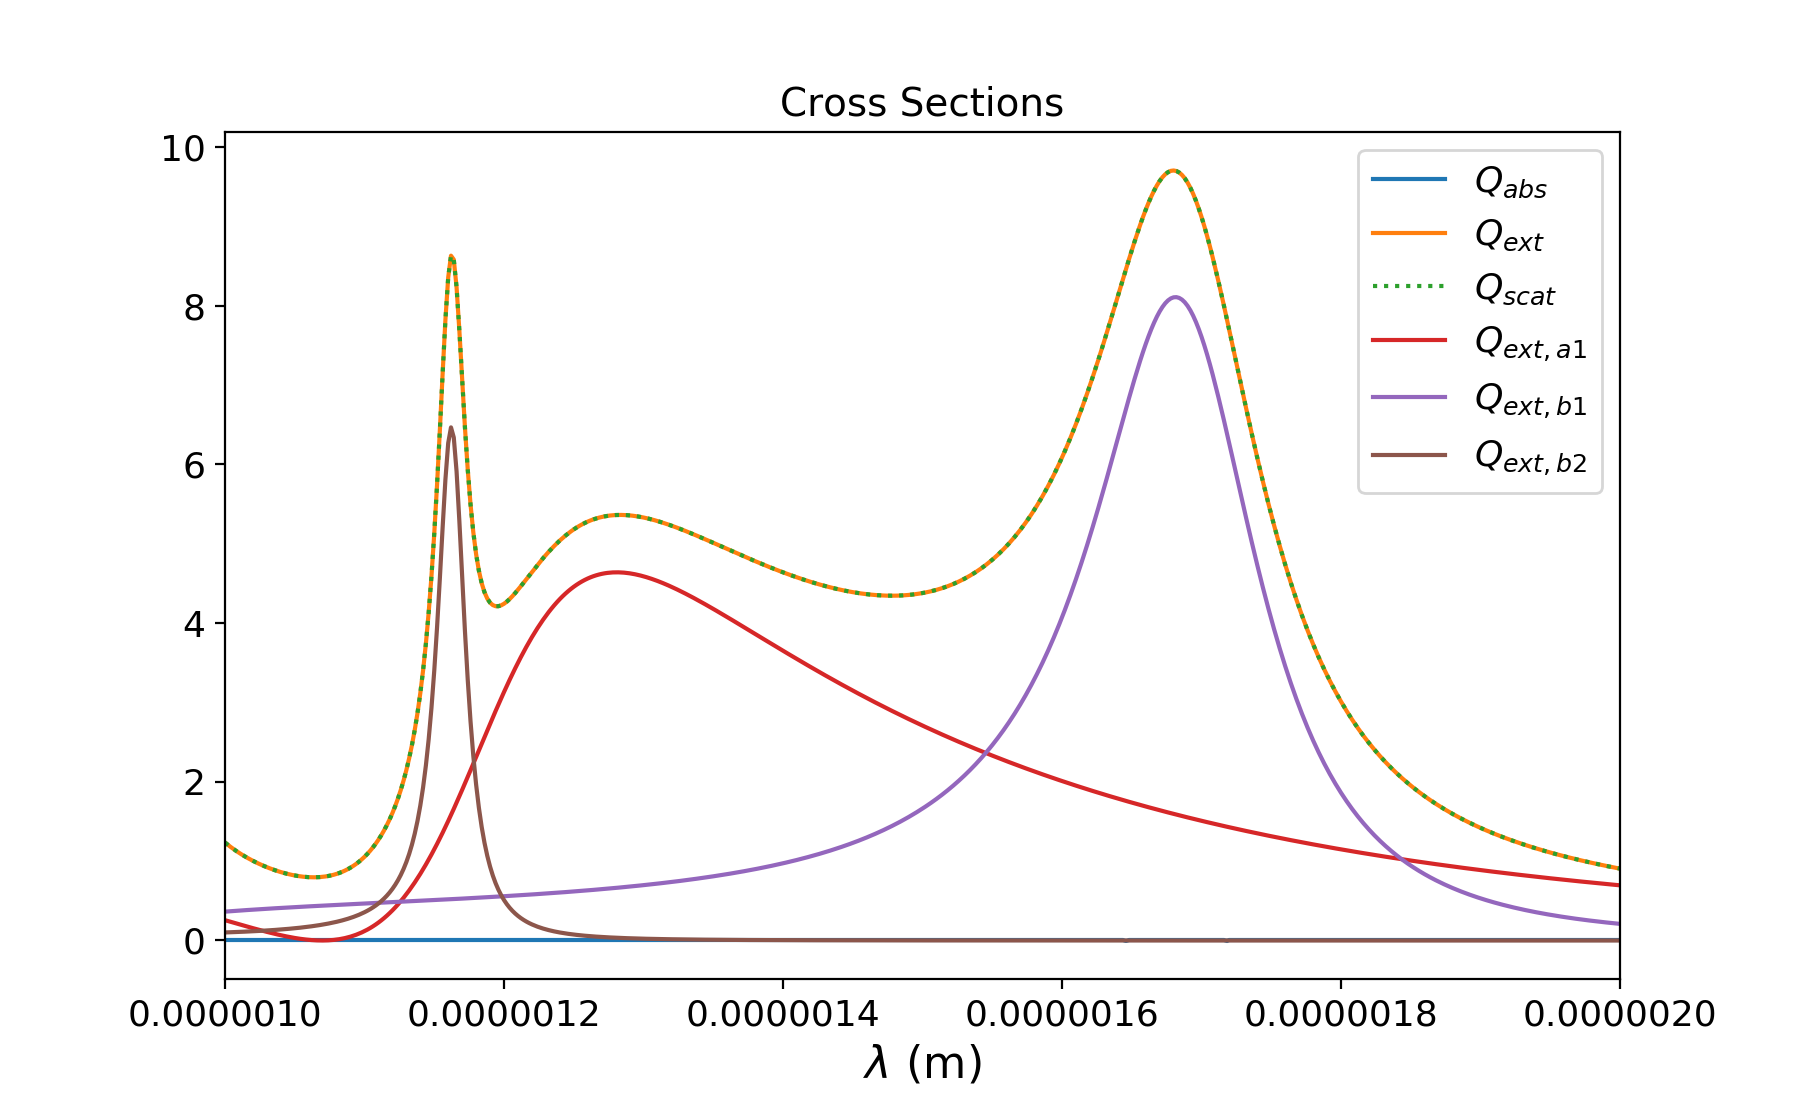

(1e-06, 2e-06)

In [5]:
fig, ax = plt.subplots(figsize = (9, 5.5))

ax.plot(mie.cross_sections['Qabs'], label='$Q_{abs}$')
ax.plot(mie.cross_sections['Qext'], label='$Q_{ext}$')
ax.plot(mie.cross_sections['Qscat'], label='$Q_{scat}$', linestyle=':')
ax.plot(mie.expanded_Qext['Qext_a1'], label='$Q_{ext, a1}$')
ax.plot(mie.expanded_Qext['Qext_b1'], label='$Q_{ext, b1}$')
ax.plot(mie.expanded_Qext['Qext_b2'], label='$Q_{ext, b2}$')
ax.set_xlabel('$\lambda$ (m)', fontsize=16)
ax.set_ylabel('', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.legend(fontsize=13)
plt.title('Cross Sections', fontsize=14)
plt.xlim(1000E-9, 2000E-9)